# NBA Finals Analysis
### Brendan Ok
#### April 2018

## Data Introduction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

champdata = pd.read_csv('championsdata.csv')
loserdata = pd.read_csv('runnerupsdata.csv') #No second place trophies in the NBA


## Data Manipulation
#### The data was separated by winner and loser of each NBA finals since 1980. I consolidated everything into one big dataframe to analyze. 

In [3]:
champwins = champdata[champdata.Win != 0]
loserwins = loserdata[loserdata.Win != 0]
champlosses = champdata[champdata.Win == 0]
loserlosses = loserdata[loserdata.Win == 0]
total = [champdata,loserdata]
totaldata = pd.concat(total, ignore_index=True)
totaldata.to_csv('total_data.csv')
totaldata.head()

,AST,BLK,DRB,FG,FGA,FGP,FT,FTA,FTP,Game,...,TOV,TP,TPA,TPP,TRB,Team,Win,X,Y,Year
0,30,9,31,48,89,0.539,13,15,0.867,1,...,17,0,0,NaN,43,Lakers,1,1,NaN,1980
1,32,7,37,48,95,0.505,8,12,0.667,2,...,26,0,1,0.0,52,Lakers,0,2,NaN,1980
2,20,5,34,44,92,0.478,23,30,0.767,3,...,20,0,1,0.0,56,Lakers,1,3,NaN,1980
3,23,6,31,44,93,0.473,14,19,0.737,4,...,19,0,0,NaN,49,Lakers,0,4,NaN,1980
4,28,6,37,41,91,0.451,26,33,0.788,5,...,21,0,0,NaN,56,Lakers,1,5,NaN,1980


In [4]:
totaldata.corr()

,AST,BLK,DRB,FG,FGA,FGP,FT,FTA,FTP,Game,...,PTS,STL,TOV,TP,TPA,TPP,TRB,Win,Y,Year
AST,1.000000,0.194001,0.123821,0.749641,0.454247,0.590824,0.029499,0.037604,-0.031971,-0.054542,...,0.683006,0.196441,0.077022,-0.102623,-0.276748,0.097600,0.185989,0.251406,-0.487318,-0.445081
BLK,0.194001,1.000000,0.219700,0.179765,0.159638,0.089639,-0.007369,0.006419,-0.039534,-0.066202,...,0.119094,0.064297,0.161285,-0.153957,-0.188842,-0.031475,0.252737,0.126298,-0.274307,-0.183798
DRB,0.123821,0.219700,1.000000,0.096221,0.070674,0.059490,0.110691,0.125358,-0.007417,-0.055717,...,0.182796,-0.089343,0.048353,0.137214,0.123773,0.033176,0.698958,0.381625,0.183821,0.151810
FG,0.749641,0.179765,0.096221,1.000000,0.665348,0.742642,-0.069200,-0.068486,-0.018330,-0.082516,...,0.854854,0.238974,0.044527,-0.151479,-0.317634,0.084460,0.223357,0.268474,-0.400410,-0.411575
FGA,0.454247,0.159638,0.070674,0.665348,1.000000,0.001000,-0.146139,-0.150414,-0.038281,-0.073518,...,0.494550,0.259208,-0.052962,-0.190765,-0.200009,-0.111257,0.489392,-0.059171,-0.355900,-0.364788
FGP,0.590824,0.089639,0.059490,0.742642,0.001000,1.000000,0.039247,0.039998,0.018193,-0.040828,...,0.704453,0.091934,0.100550,-0.022831,-0.238170,0.214053,-0.139971,0.415639,-0.211544,-0.214627
FT,0.029499,-0.007369,0.110691,-0.069200,-0.146139,0.039247,1.000000,0.926574,0.353332,0.094813,...,0.373248,-0.051407,-0.013607,-0.141299,-0.181846,-0.011878,0.103799,0.216592,-0.227769,-0.183993
FTA,0.037604,0.006419,0.125358,-0.068486,-0.150414,0.039998,0.926574,1.000000,-0.002128,0.089416,...,0.340540,-0.055700,-0.001706,-0.135138,-0.175234,0.013401,0.127991,0.200944,-0.229065,-0.178342
FTP,-0.031971,-0.039534,-0.007417,-0.018330,-0.038281,0.018193,0.353332,-0.002128,1.000000,0.023081,...,0.141767,0.005307,-0.053031,-0.035612,-0.046167,-0.040988,-0.054430,0.102181,-0.000999,-0.015968
Game,-0.054542,-0.066202,-0.055717,-0.082516,-0.073518,-0.040828,0.094813,0.089416,0.023081,1.000000,...,-0.021135,-0.044331,-0.046685,0.035516,0.051502,-0.044009,-0.032042,0.003779,0.028923,0.003119


## Rebounding numbers
#### How has rebounding changed throughout the years. The graphs show the total rebounds gathered from each game. 

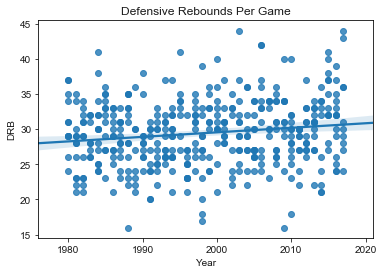

In [5]:
#change in defensive rebounds over the years
sns.regplot(x='Year', y='DRB', data=totaldata, label="DRB").set_title('Defensive Rebounds Per Game')
sns.set(color_codes=True)

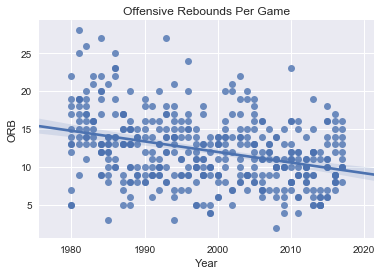

In [6]:
#change in offensive rebounds over the years
sns.regplot(x='Year', y='ORB', data=totaldata, label="ORB").set_title('Offensive Rebounds Per Game')
sns.set(color_codes=True)

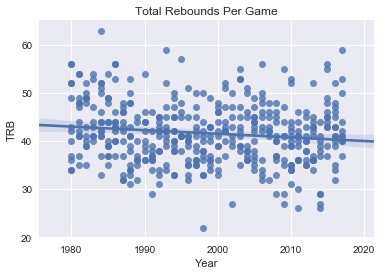

In [7]:
#Change in total rebounding over the years
sns.regplot(x='Year', y='TRB', data=totaldata, label="TRB").set_title('Total Rebounds Per Game')
sns.set(color_codes=True)


**Note:** Looking at total rebounds alone shows that the overall number of boards has gone down slightly, but nothing too noticeable. The thing that pops out to me the most is the big change in offensive boards. However, why are the defensive boards going up over time? One can attribute this to the change in role of big men in the league. Defensive rebounds are simply the easier boards to get, and anyone from the team has a good chance to get them. As lineups get smaller, less offensive rebounds are being recorded. 

## Assist and Turnover Numbers

In [8]:
#create assist to turnover ratio
totaldata['tovratio'] = totaldata['AST'] / totaldata['TOV']

Text(0.5,1,'Total Assists Per Game')

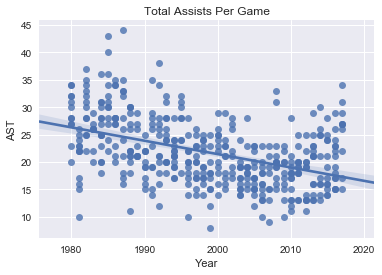

In [9]:
sns.regplot(x='Year', y='AST', data=totaldata).set_title('Total Assists Per Game')

Text(0.5,1,'Turnovers')

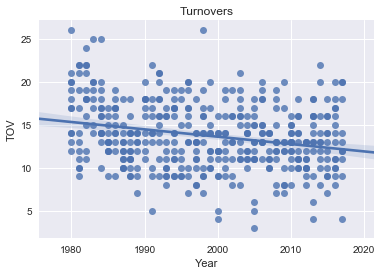

In [10]:
sns.regplot(x='Year', y='TOV', data=totaldata).set_title('Turnovers')

Text(0.5,1,'Assist To Turnover Ratio')

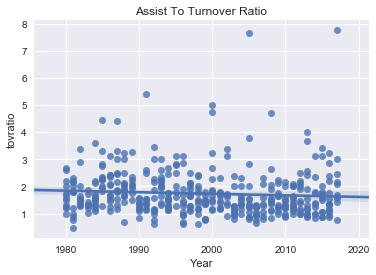

In [11]:
sns.regplot(x='Year', y='tovratio', data=totaldata).set_title('Assist To Turnover Ratio')

**Note:** Interestingly,  despite the big drop off in assists, the assist to turnover rate hasn't changed much. One would think a decrease in assists means they're turning it over more but that doesn't seem to be the case. Players are better at taking care of the ball or maybe there's an increase in isolation play which slows down the pace of the game. Which leads me to believe that the field goal attempts per team will go down

## Field Goal Changes

Text(0.5,1,'Total Field Goals Attempted Per Game')

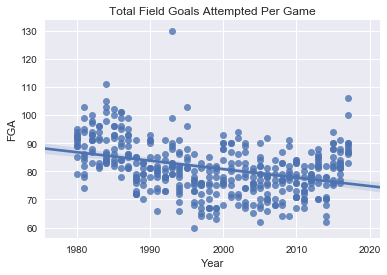

In [12]:
sns.regplot(x='Year', y='FGA', data=totaldata).set_title('Total Field Goals Attempted Per Game')


Text(0.5,1,'Total Field Goals Per Game')

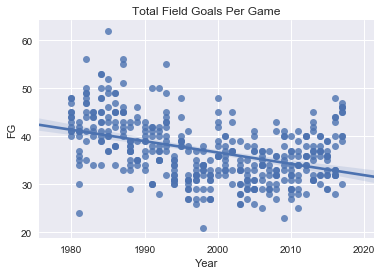

In [13]:
sns.regplot(x='Year', y='FG', data=totaldata).set_title('Total Field Goals Per Game')

Text(0.5,1,'Total Assists Per Game')

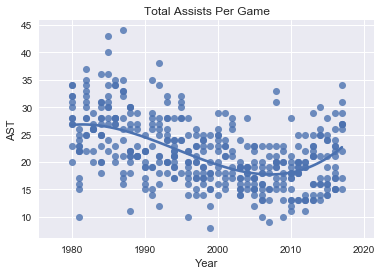

In [14]:
sns.regplot(x='Year', y='AST', data=totaldata,scatter_kws={"s": 50},order=3, ci=None, truncate=True).set_title('Total Assists Per Game')

Text(0.5,1,'Total Field Goals Per Game')

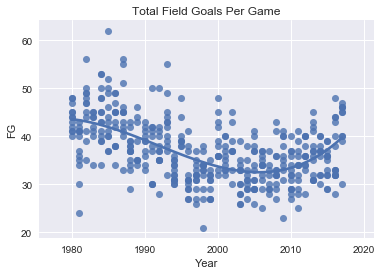

In [15]:
sns.regplot(x='Year', y='FG', data=totaldata, scatter_kws={"s": 50},order=3, ci=None, truncate=True).set_title('Total Field Goals Per Game')

**Note:** Seems like AST and FG are positively correlated looking at post 2010 Finals data.

## Three Point Change


Text(0.5,1,'Total Three Point Field Goals Attempted Per Game')

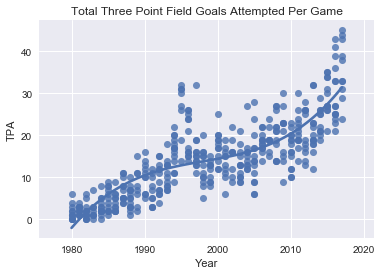

In [32]:
sns.regplot(x='Year', y='TPA', data=totaldata, scatter_kws={"s": 50},order=3, ci=None, truncate=True).set_title('Total Three Point Field Goals Attempted Per Game')


Text(0.5,1,'Total Three Point Field Goals Per Game')

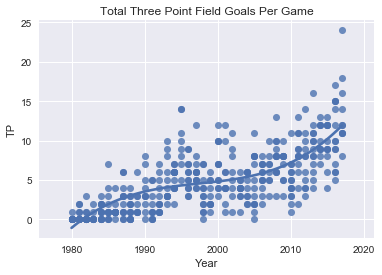

In [36]:
sns.regplot(x='Year', y='TP', data=totaldata, scatter_kws={"s": 50},order=3, ci=None, truncate=True).set_title('Total Three Point Field Goals Per Game')


Text(0.5,1,'Three Point Percentage Per Game')

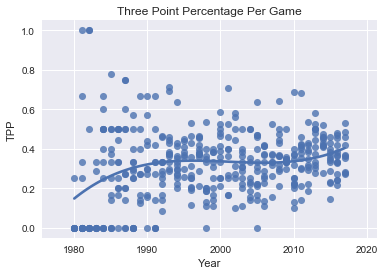

In [18]:
sns.regplot(x='Year', y='TPP', data=totaldata, scatter_kws={"s": 50},order=3, ci=None, truncate=True).set_title('Three Point Percentage Per Game')

**Note:** Percentage seems to have plateaued, which is just about the only surpising aspect of three point shooting in the NBA. However it isn't that surprising considering the change in volume of TPA. It's quite amazing how despite the growth of long range shots, that our efficiency doesn't go down.  

## Average data
**Note:** Ok so there is a little problem here. Some series are longer than others Obviously a 7 game series will probably generate more FG attempts, assists, rebounds that sort of thing and maybe even threes. 

In [19]:
ags = totaldata[['Year', 'TPA','TP','FG', 'FGA','AST']].copy()
ags.index = totaldata['Year']
ags = ags.drop(['Year'], axis=1)
ags.head(10)

,TPA,TP,FG,FGA,AST
Year,,,,,
1980,0,0,48,89,30
1980,1,0,48,95,32
1980,1,0,44,92,20
1980,0,0,44,93,23
1980,0,0,41,91,28
1980,2,0,45,92,27
1981,1,0,41,95,23
1981,3,0,41,82,17
1981,3,2,40,89,24


**Note:** I don't necessarily need to reorganize the data, but it makes it cleaner and therefore easier on my eyes (plus I can  flex my data manipulation skills). 

Basically what I'm doing here is making a new dataframe with just the stuff that I want to see. In this case, I'm               checking out the shooting splits plus assists since there's possibly a relationship there as shown through the total             data. One thing I do have to do, however, is to average the stats out by year which is what I'm about to do.

In [20]:
threes_by_year = ags.groupby("Year").mean().TPA
threes_made_by_year = ags.groupby("Year").mean().TP
fg_by_year = ags.groupby("Year").mean().FGA
fg_made_by_year = ags.groupby("Year").mean().FG
threes_by_year.head()

Year
1980    1.666667
1981    2.333333
1982    1.916667
1983    2.250000
1984    2.928571
Name: TPA, dtype: float64

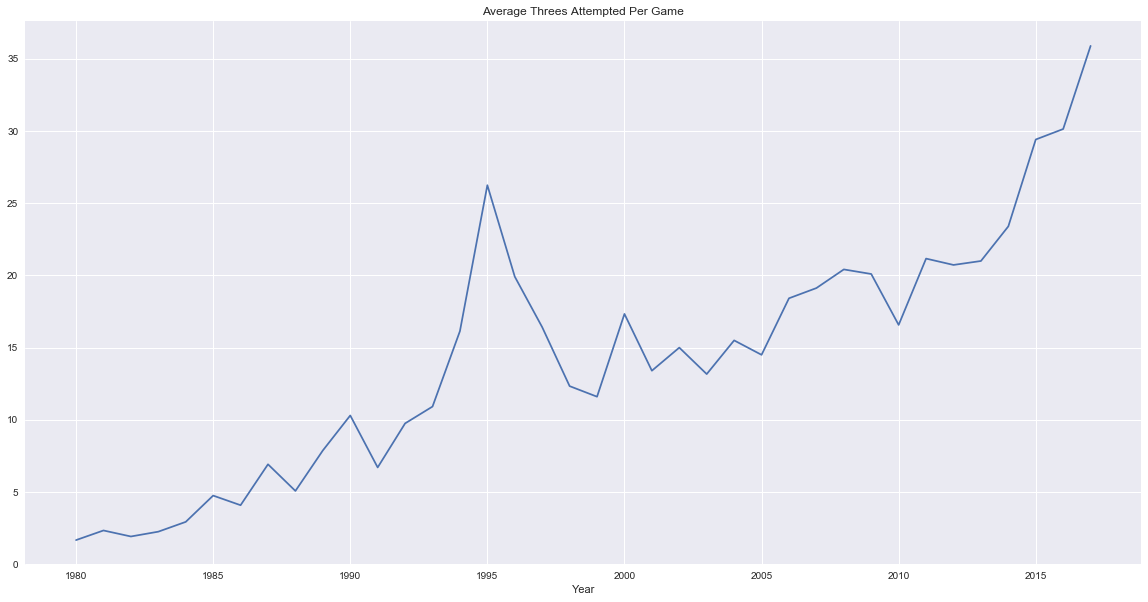

In [21]:
threes_by_year.plot(figsize=(20,10), title="Average Threes Attempted Per Game")

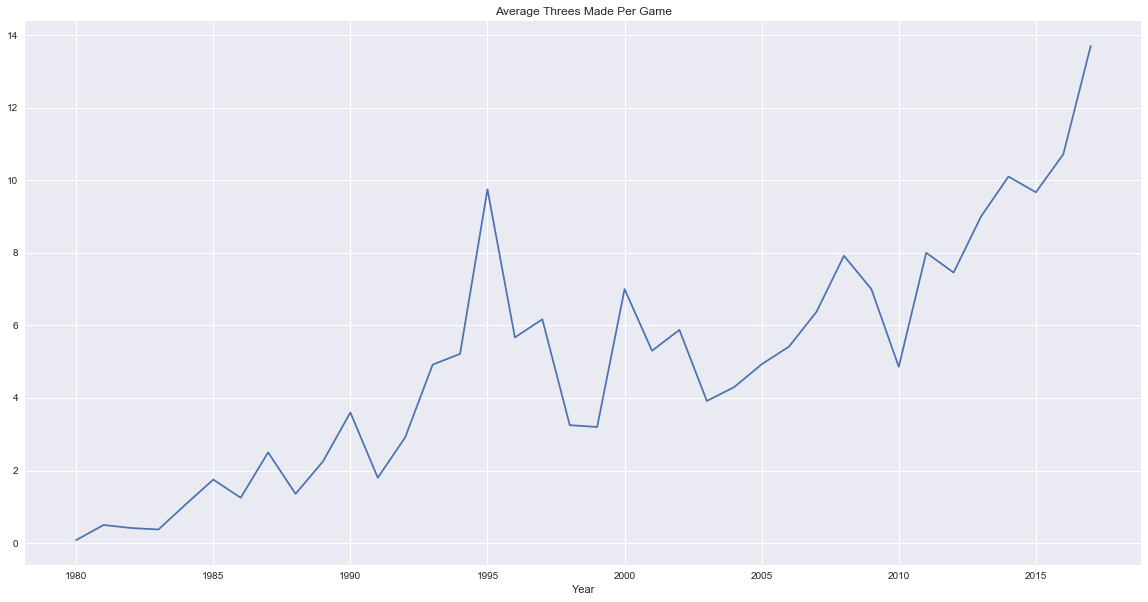

In [22]:
threes_made_by_year.plot(figsize=(20,10), title="Average Threes Made Per Game")

**Note:** That spike in 1995 is still there. It was a Rockets sweep that year against the Magic so it was surprising to see in the total data how many threes were attempted. In 1995, the two teams collectively shot 210 threes which is ridiculous considering just last year the Rockets were also in the finals against the Knicks where they collectively shot 226 threes. But the big difference is that in 1994, they played all 7 possible games.

Source: www.basketball-reference.com

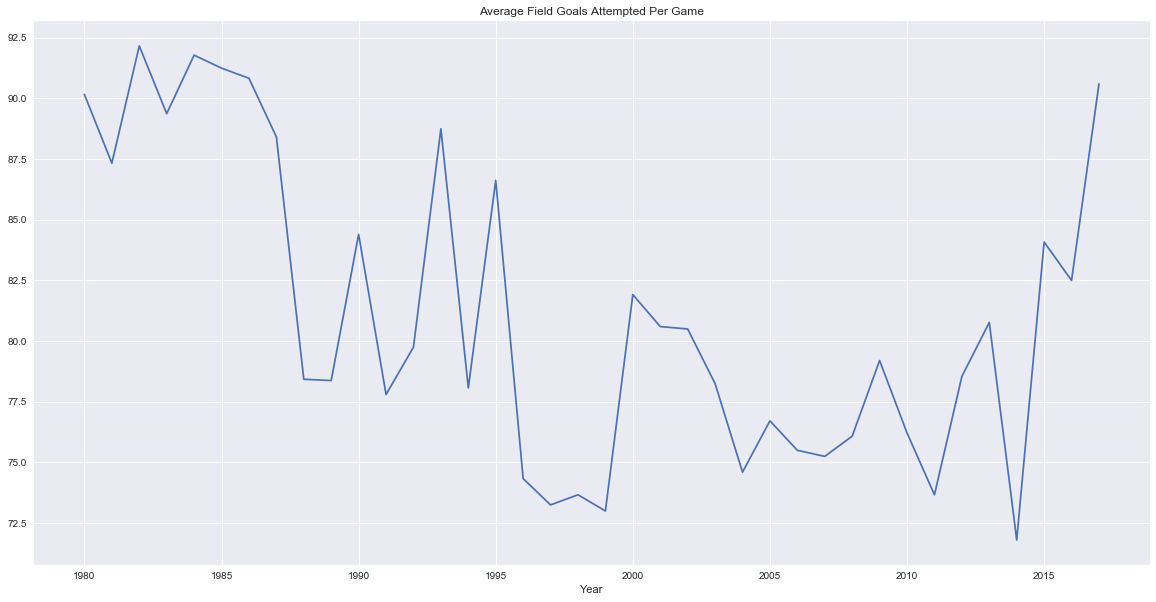

In [23]:
fg_by_year.plot(figsize=(20,10), title="Average Field Goals Attempted Per Game")

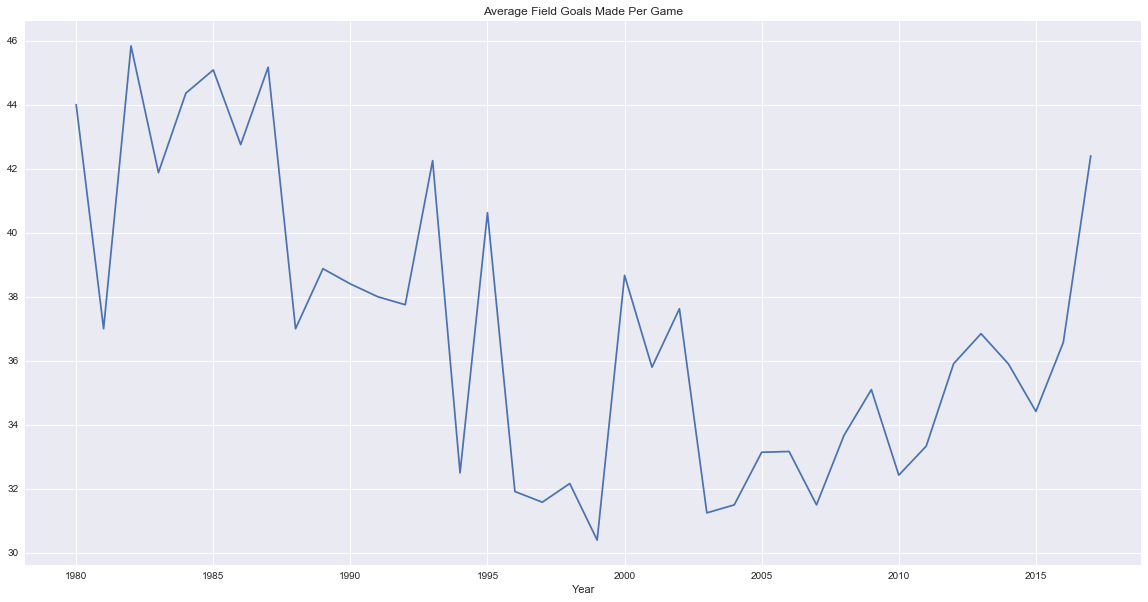

In [24]:
fg_made_by_year.plot(figsize=(20,10), title="Average Field Goals Made Per Game")

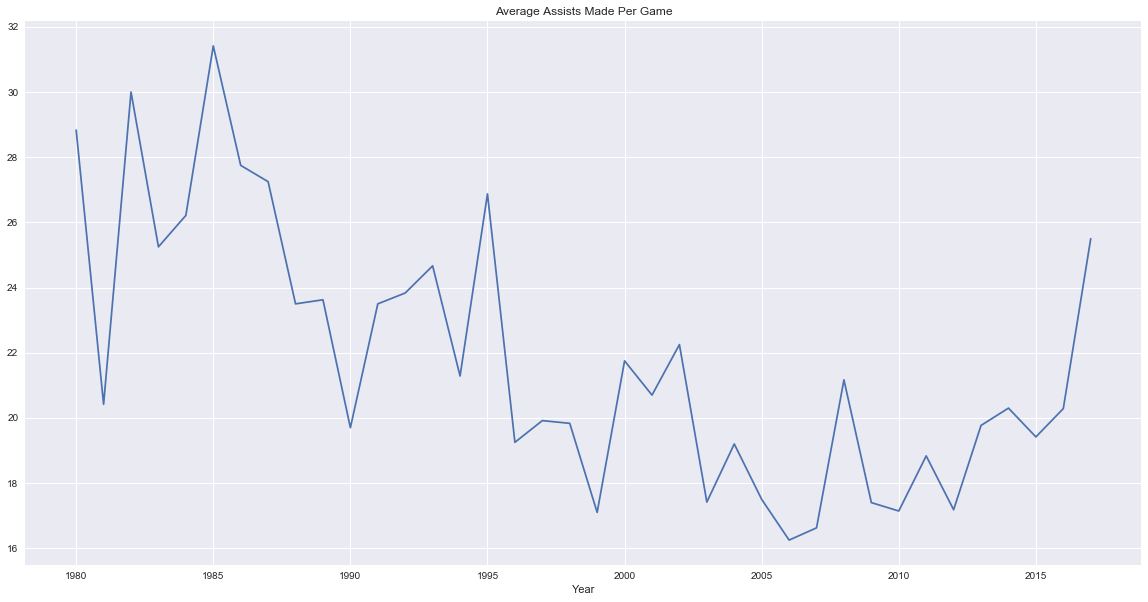

In [25]:
assist_by_year = ags.groupby("Year").mean().AST
assist_by_year.plot(figsize=(20,10), title="Average Assists Made Per Game")

**Note:** The correlation is still there. It's eerie how similar these graphs look.

In [33]:
ags.corr()

,TPA,TP,FG,FGA,AST
TPA,1.000000,0.882875,-0.317634,-0.200009,-0.276748
TP,0.882875,1.000000,-0.151479,-0.190765,-0.102623
FG,-0.317634,-0.151479,1.000000,0.665348,0.749641
FGA,-0.200009,-0.190765,0.665348,1.000000,0.454247
AST,-0.276748,-0.102623,0.749641,0.454247,1.000000
